# Biodiversity in National Parks Data Explration and Analysis

In this file I will explore the data and try to answer some questions about the biodiversity in National Parks. I will use the following datasets:  
- `observations.csv`
- `species_info.csv`


## Project Goal

- Understand and analyze the biodiversity within national parks based on species observations and conservation status.
- Identify patterns and trends in species distribution and conservation.
- Potentially, provide insights for conservation efforts.

## Analysis Plan

Descriptive 
- What is the distribution of species categories across all parks?
- What is the distribution of observations across different parks?
- What are the most commonly observed species in each park?
- What are the different conservation statuses and their frequency?
- What are the common names of the most observed scientific names?

Exploratory
- How does the distribution of species categories vary between different parks?
- Are there any correlations between species category and conservation status?
- Which parks have the highest biodiversity (number of unique species)?
- Which species have the largest range (observed in the most parks)?
- Are there species that are observed very frequently in one park, but rarely in others?
- Explore the distribution of observations for species within each conservation status.

Inferential 
- Is there a statistically significant difference in the number of observations between different parks?
- Is there a statistically significant association between species category and conservation status?
- Does the number of observations of a species correlate with its conservation status?
- Can we test if a specific park has a significantly higher observation number of a specific category of animal than the average of all parks?

Predictive 
- Can we predict the number of observations of a species in a park based on its category and conservation status?
- Can we predict the conservation status of a species based on its observation patterns?



## Observing the data


In [ ]:
# !pip install numpy
# !pip install matplotlib
# !pip install pandas
# !pip install seaborn
#!pip install scikit-learn
#!pip install imbalanced-learn


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: C:\Users\Holly\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [138]:
import csv 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
observations_df = pd.read_csv('observations.csv')
species_df = pd.read_csv('species_info.csv')

In [140]:
observations_df.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [141]:
species_df.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [142]:
observations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [143]:
species_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


Observing these datasets we can assume that the structure of the data is as follows:
- observations.csv:  

|Name|Type|Description|
|---|---|---|
|scientific_name| String | The scientific name of the species (foreign key) |
| park_name | String | The name of the national park where the species was observed |
| Observations | Int | The number of times the species was observed in the park |

- species_info.csv:

|Name|Type| Description|
|---|---| ---|
| category | String | The category of the species (mammal, bird, reptile, etc.) |
| scientific_name | String | The scientific name of the species (primary key)|
| common_names | String | The common names of the species |
| conservation_status | String | The species conservation status |

Scientific name can be the unique identifier for the species in both datasets.

### Cleaning the data 

Immediately there are NaN's in the conservation_status column. I will replace these with 'No Intervention' as it is likely that these species are not in danger.
Also, there are duplicate scientific names in the species_info dataset, I will merge these together and sum the observations.

In [144]:
#replace nan values with 'No Intervention'
species_df.fillna('No Intervention', inplace=True)
species_df.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention


In [145]:
#conosolodate scientific name in species_df
#sort species by scientific name
species_df = species_df.sort_values('scientific_name').reset_index(drop=True)
#loop through species_df and join the rows with the same scientific name by adding the common name to the previous instance
for i in range(1, len(species_df)):
    if species_df.scientific_name[i] == species_df.scientific_name[i-1]:
        species_df.common_names[i] = species_df.common_names[i-1] + ", " + species_df.common_names[i]
        species_df.drop(i-1, inplace=True)

In [146]:
#consolodate scientific names in observations_df
#sort species by scientific name and park name
observations_df = observations_df.sort_values(['scientific_name', 'park_name']).reset_index(drop=True)

#loop through observations_df and join the rows with the same scientific name by adding the observations to the previous instance that also matches the park name
for i in range(1, len(observations_df)):
    if observations_df.scientific_name[i] == observations_df.scientific_name[i-1] and observations_df.park_name[i] == observations_df.park_name[i-1]:
        observations_df.observations[i] = observations_df.observations[i-1] + observations_df.observations[i]
        observations_df.drop(i-1, inplace=True)


C:\Users\Holly\AppData\Local\Temp\ipykernel_26052\842529817.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  observations_df.observations[i] = observations_df.observations[i-1] + observations_df.observations[i]
C:\Users\Holly\AppData\Local\Temp\ipykernel_26052\842529817.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  observations_df.observations[i] = observations_df.observations[i-1] + observations_df.observations[i]
C:\Users\Holly\AppData\Local\Temp\ipykernel_26052\842529817.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

In [147]:
observations_df.describe()

,observations
count,22164.000000
mean,149.555089
std,81.421299
min,9.000000
25%,88.000000
50%,129.000000
75%,217.000000
max,805.000000


In [148]:
species_df.describe()

,category,scientific_name,common_names,conservation_status
count,5541,5541,5541,5541
unique,7,5541,5237,5
top,Vascular Plant,Abies bifolia,Dicranum Moss,No Intervention
freq,4262,1,7,5362


In [149]:
all_data = pd.merge(observations_df, species_df, on='scientific_name')

## Descriptive Analysis

1. What is the distribution of species categories across all parks?
2. What is the distribution of observations across different parks?
3. What are the most commonly observed species in each park?
4. What are the different conservation statuses and their frequency?
5. What are the common names of the most observed scientific names?



| category          |   Bryce National Park |   Great Smoky Mountains National Park |   Yellowstone National Park |   Yosemite National Park |
|:------------------|----------------------:|--------------------------------------:|----------------------------:|-------------------------:|
| Amphibian         |                    79 |                                    79 |                          79 |                       79 |
| Bird              |                   488 |                                   488 |                         488 |                      488 |
| Fish              |                   125 |                                   125 |                         125 |                      125 |
| Mammal            |                   176 |                                   176 |                         176 |                      176 |
| Nonvascular Plant |                   333 |                                   333 |                         333 |                      333 |

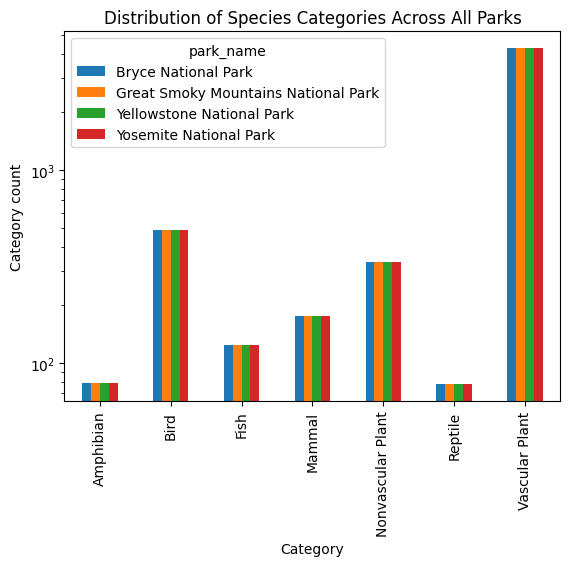

In [192]:
#1. What is the distribution of species categories across all parks?

ct_category_park_count = all_data.groupby(['category', 'park_name']).category.count().unstack()
print(ct_category_park_count.to_markdown())
ct_category_park_count.plot(kind='bar', stacked=False)
plt.title('Distribution of Species Categories Across All Parks')
plt.xlabel('Category')
plt.ylabel('Category count')
plt.yscale('log')

plt.savefig('Graphs/Distribution_of_Species_Categories_Across_All_Parks.png', bbox_inches='tight')

plt.show()


| category          |   Bryce National Park |   Great Smoky Mountains National Park |   Yellowstone National Park |   Yosemite National Park |
|:------------------|----------------------:|--------------------------------------:|----------------------------:|-------------------------:|
| Amphibian         |                  7380 |                                  5707 |             19440           |                    11444 |
| Bird              |                 51647 |                                 37728 |            127251           |                    76207 |
| Fish              |                 12423 |                                  9206 |             30574           |                    18615 |
| Mammal            |                 20550 |                                 15012 |             50795           |                    30339 |
| Nonvascular Plant |                 32992 |                                 24857 |             83021           |                    49783 |

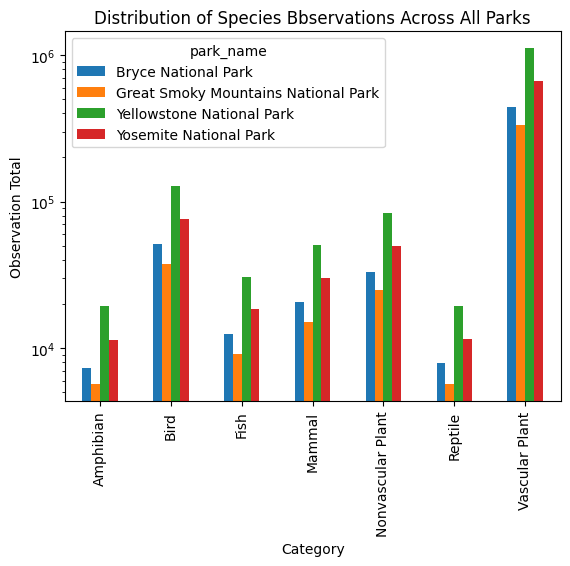

In [190]:
#2. What is the distribution of observations across different parks?
ct_category_park_v_observations = all_data.groupby(['category', 'park_name'])['observations'].sum().unstack()
ct_category_park_v_observations.plot(kind='bar', stacked=False)
print(ct_category_park_v_observations.to_markdown())
plt.title('Distribution of Species Bbservations Across All Parks')
plt.xlabel('Category')
plt.ylabel('Observation Total')

plt.yscale('log')
plt.savefig('Graphs/Distribution_of_Species_Observations_Across_All_Parks.png', bbox_inches='tight')
plt.show()




In [193]:
#3. What are the most commonly observed species in each park?

most_common_species = all_data.groupby(['park_name', 'scientific_name'])['observations'].sum().reset_index()
most_common_species = most_common_species.merge(species_df[['scientific_name', 'common_names', 'category', 'conservation_status']], on='scientific_name')
idx = most_common_species.groupby(['park_name'])['observations'].transform(max) == most_common_species['observations']

most_common_species = most_common_species[idx].sort_values('park_name').reset_index(drop=True)

print(most_common_species.to_markdown())





|    | park_name                           | scientific_name       |   observations | common_names                                                                                                                                                                  | category       | conservation_status   |
|---:|:------------------------------------|:----------------------|---------------:|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:---------------|:----------------------|
|  0 | Bryce National Park                 | Columba livia         |            339 | Rock Dove, Common Pigeon, Rock Dove, Rock Pigeon, Rock Pigeon                                                                                                                 | Bird           | No Intervention       |
|  1 | Great Smoky Mountains National Park | Streptopelia decaocto |            256 | Euras

| park_name                           |   Endangered |   In Recovery |   No Intervention |   Species of Concern |   Threatened |
|:------------------------------------|-------------:|--------------:|------------------:|---------------------:|-------------:|
| Bryce National Park                 |            6 |             1 |              1277 |                   43 |            1 |
| Great Smoky Mountains National Park |            2 |             1 |              1296 |                   31 |            2 |
| Yellowstone National Park           |            3 |             1 |              1284 |                   31 |            3 |
| Yosemite National Park              |            4 |             0 |              1281 |                   41 |            4 |


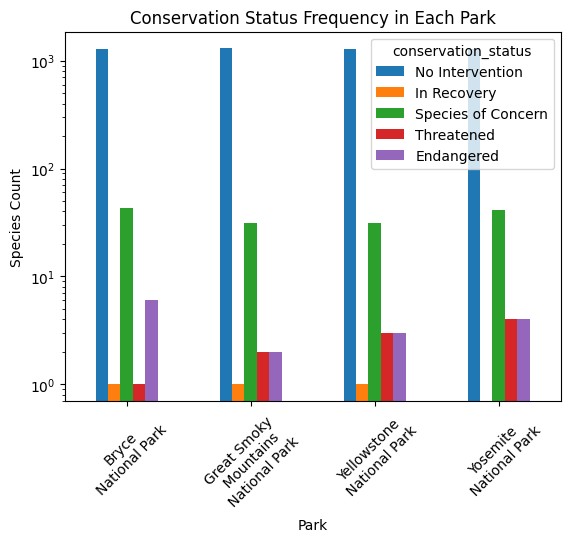

In [200]:
#4. What are the different conservation statuses and their frequency?
#crosstab of conservation status and park
ct_park_conservation_count = pd.crosstab(observations_df.park_name, species_df.conservation_status)
print(ct_park_conservation_count.to_markdown())
# ct_park_conservation_count.plot(kind='bar', stacked=False)

status_order = ['No Intervention', 'In Recovery', 'Species of Concern', 'Threatened', 'Endangered']
park_names_display = ['Bryce\nNational Park', 'Great Smoky\n Mountains\n National Park', 'Yellowstone\n National Park','Yosemite\n National Park']
ct_park_conservation_count = ct_park_conservation_count.reindex(status_order, axis=1)
ct_park_conservation_count = ct_park_conservation_count.fillna(0)
ct_park_conservation_count.plot(kind='bar', stacked=False)
plt.title('Conservation Status Frequency in Each Park')
plt.xlabel('Park')
plt.ylabel('Species Count')
plt.yscale('log')
plt.xticks(rotation=45)
plt.xticks(ticks=range(len(park_names_display)), labels=park_names_display)

plt.savefig('Graphs/Conservation_Status_Frequency_in_Each_Park.png', bbox_inches='tight')
plt.show()




In [201]:
#5. What are the common names of the most observed scientific names?
most_observed_species = all_data.sort_values('observations', ascending=False).drop_duplicates('scientific_name').reset_index(drop=True)
most_observed_species = most_observed_species[['scientific_name', 'common_names', 'category','observations']]
print(most_observed_species.head().to_markdown())

|    | scientific_name       | common_names                                                                                                                                                                  | category       |   observations |
|---:|:----------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:---------------|---------------:|
|  0 | Holcus lanatus        | Common Velvetgrass, Yorkshire-Fog, Common Velvetgrass, Velvetgrass, Yorkshire Fog, Common Velvet Grass, Velvetgrass                                                           | Vascular Plant |            805 |
|  1 | Streptopelia decaocto | Eurasian Collared Dove, Eurasian Collared Dove, Eurasian Collared-Dove, Eurasian Collared-Dove                                                                                | Bird           |            771 |
|  2 | Puma concolor         | Couga

## Exploratory

2. Are there any correlations between species category and conservation status?
4. Which species have the largest range (observed in the most parks)?
5. Are there species that are observed very frequently in one park, but rarely in others?


| category          |   Endangered |   In Recovery |   No Intervention |   Species of Concern |   Threatened |
|:------------------|-------------:|--------------:|------------------:|---------------------:|-------------:|
| Amphibian         |            1 |             0 |                72 |                    4 |            2 |
| Bird              |            4 |             3 |               413 |                   68 |            0 |
| Fish              |            3 |             0 |               114 |                    4 |            4 |
| Mammal            |            6 |             0 |               146 |                   22 |            2 |
| Nonvascular Plant |            0 |             0 |               328 |                    5 |            0 |
| Reptile           |            0 |             0 |                73 |                    5 |            0 |
| Vascular Plant    |            1 |             0 |              4216 |                   43 |            2 |


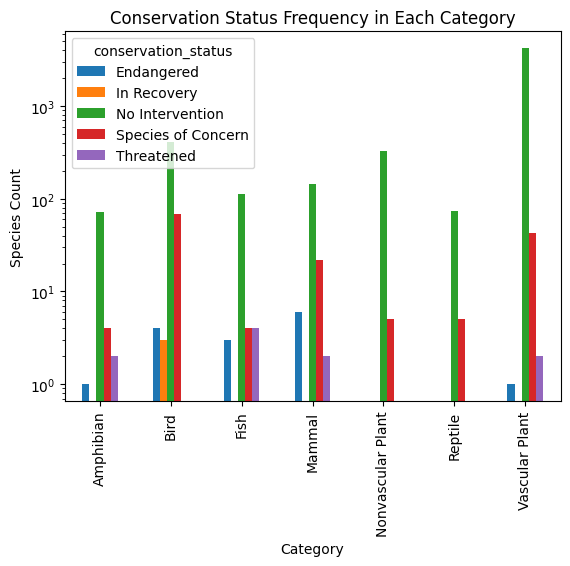

In [202]:
#1. Are there any correlations between species category and conservation status?
ct_category_conservation_count = pd.crosstab(species_df.category, species_df.conservation_status)
print(ct_category_conservation_count.to_markdown())
ct_category_conservation_count.plot(kind='bar', stacked=False)
plt.title('Conservation Status Frequency in Each Category')
plt.xlabel('Category')
plt.ylabel('Species Count')
plt.yscale('log')
plt.savefig('Graphs/Conservation_Status_Frequency_in_Each_Category.png', bbox_inches='tight')
plt.show()



In [204]:
#chi square test
from scipy.stats import chi2_contingency

#chi square test for independence
chi2, p, dof, expected = chi2_contingency(ct_category_conservation_count)
print(f'Chi2: {chi2}')
print(f'p-value: {p}')
print(f'degrees of freedom: {dof}')
print(f'expected: {expected}')


Chi2: 591.1513416161314
p-value: 1.6816257270187694e-109
degrees of freedom: 24
expected: [[2.13860314e-01 4.27720628e-02 7.64479336e+01 2.15286049e+00
  1.42573543e-01]
 [1.32106118e+00 2.64212236e-01 4.72235337e+02 1.32986825e+01
  8.80707454e-01]
 [3.38386573e-01 6.76773146e-02 1.20961920e+02 3.40642483e+00
  2.25591049e-01]
 [4.76448295e-01 9.52896589e-02 1.70314384e+02 4.79624616e+00
  3.17632196e-01]
 [9.01461830e-01 1.80292366e-01 3.22242555e+02 9.07471576e+00
  6.00974553e-01]
 [2.11153221e-01 4.22306443e-02 7.54802382e+01 2.12560910e+00
  1.40768814e-01]
 [1.15376286e+01 2.30752572e+00 4.12431763e+03 1.16145461e+02
  7.69175239e+00]]


| category          |   Endangered |   In Recovery |   No Intervention |   Species of Concern |   Threatened |
|:------------------|-------------:|--------------:|------------------:|---------------------:|-------------:|
| Amphibian         |      36      |             0 |           143.122 |              127.75  |       70.5   |
| Bird              |      35.875  |           116 |           153.889 |              134.713 |        0     |
| Fish              |      37.9167 |             0 |           146.072 |              131.812 |      102.812 |
| Mammal            |      60.9583 |             0 |           171.656 |              163.727 |       72.25  |
| Nonvascular Plant |       0      |             0 |           143.253 |              135.25  |        0     |
| Reptile           |       0      |             0 |           144.322 |              126.8   |        0     |
| Vascular Plant    |      40.5    |             0 |           150.157 |              128.692 |       69     |
|

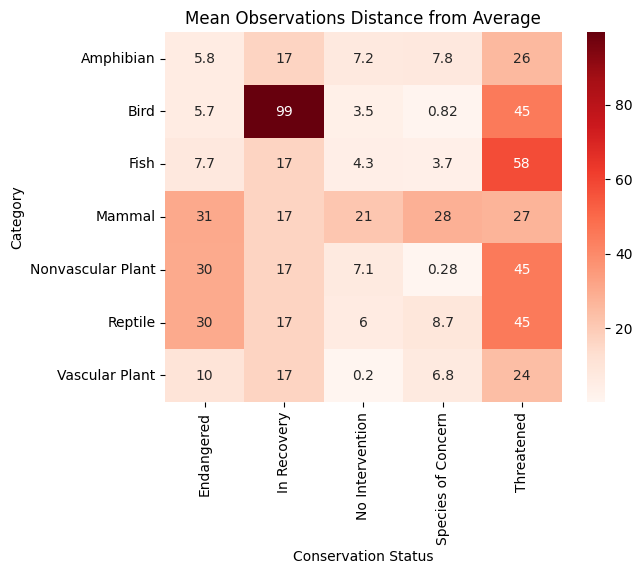

In [206]:
#cable with conservaiton status and category with their mean observation values
ct_category_conservaiton_observations_mean = all_data.groupby(['category', 'conservation_status'])['observations'].mean().unstack()
ct_category_conservaiton_observations_mean = ct_category_conservaiton_observations_mean.fillna(0)
print(ct_category_conservaiton_observations_mean.to_markdown())
ct_category_conservaiton_observations_mean_average = ct_category_conservaiton_observations_mean.mean() #get the average of each column
print(ct_category_conservaiton_observations_mean_average.to_markdown())
ct_category_conservaiton_observations_mean_distance = abs(ct_category_conservaiton_observations_mean - ct_category_conservaiton_observations_mean_average) #subtract the average from each value
print(ct_category_conservaiton_observations_mean_distance.to_markdown())
sns.heatmap(ct_category_conservaiton_observations_mean_distance, cmap='Reds' , annot=True)
plt.title('Mean Observations Distance from Average')
plt.xlabel('Conservation Status')
plt.ylabel('Category')
plt.savefig('Graphs/Mean_Observations_Distance_from_Average.png', bbox_inches='tight')
plt.show()




In [157]:
#4. Which species have the largest range (observed in the most parks)?
ct_species_park_observations = all_data.groupby(['scientific_name', 'park_name'])['observations'].sum().unstack()
ct_species_park_observations = ct_species_park_observations.fillna(0)
#add range column that is the max-min of the rows in the dataframe
ct_species_park_observations['range'] = ct_species_park_observations.max(axis=1) - ct_species_park_observations.min(axis=1)
#add category and conservation status columns
ct_species_park_observations = ct_species_park_observations.merge(species_df[['scientific_name', 'category', 'conservation_status']], on='scientific_name')
#sort the dataframe by the range column
ct_species_park_observations = ct_species_park_observations.sort_values('range', ascending=False)
print("Species with the largest observation range across the parks")
print(ct_species_park_observations.head().to_markdown())

Species with the largest observation range across the parks
|      | scientific_name       |   Bryce National Park |   Great Smoky Mountains National Park |   Yellowstone National Park |   Yosemite National Park |   range | category       | conservation_status   |
|-----:|:----------------------|----------------------:|--------------------------------------:|----------------------------:|-------------------------:|--------:|:---------------|:----------------------|
| 2452 | Holcus lanatus        |                   296 |                                   216 |                         805 |                      463 |     589 | Vascular Plant | No Intervention       |
| 1359 | Columba livia         |                   339 |                                   169 |                         722 |                      423 |     553 | Bird           | No Intervention       |
| 2555 | Hypochaeris radicata  |                   294 |                                   195 |                        

In [158]:
#5. Are there species that are observed very frequently in one park, but rarely in others?

#add a column that is the min of the rows in the dataframe
ct_species_park_observations = all_data.groupby(['scientific_name', 'park_name'])['observations'].sum().unstack()
ct_species_park_observations = ct_species_park_observations.fillna(0)

ct_species_park_observations['min'] = ct_species_park_observations.min(axis=1)
ct_species_park_observations = ct_species_park_observations.sort_values('min', ascending=True)
ct_species_park_observations['range'] = ct_species_park_observations.max(axis=1) - ct_species_park_observations.min(axis=1)
ct_species_park_observations['range-min'] = ct_species_park_observations['range'] - ct_species_park_observations['min']
ct_species_park_observations = ct_species_park_observations.sort_values('range-min', ascending=False)

#add category and conservation status columns
ct_species_park_observations = ct_species_park_observations.merge(species_df[['scientific_name', 'category', 'conservation_status']], on='scientific_name')

print("Species with the largest difference between the min and the range")
print(ct_species_park_observations.head().to_markdown())


Species with the largest difference between the min and the range
|    | scientific_name                 |   Bryce National Park |   Great Smoky Mountains National Park |   Yellowstone National Park |   Yosemite National Park |   min |   range |   range-min | category       | conservation_status   |
|---:|:--------------------------------|----------------------:|--------------------------------------:|----------------------------:|-------------------------:|------:|--------:|------------:|:---------------|:----------------------|
|  0 | Columba livia                   |                   339 |                                   169 |                         722 |                      423 |   169 |     553 |         384 | Bird           | No Intervention       |
|  1 | Holcus lanatus                  |                   296 |                                   216 |                         805 |                      463 |   216 |     589 |         373 | Vascular Plant | No Intervention   

## Inferential 
1. Is there a statistically significant difference in the number of observations between different parks?
2. Is there a statistically significant association between species category and conservation status?
3. Does the number of observations of a species correlate with its conservation status?
4. Can we test if a specific park has a significantly higher observation number of a specific category of animal than the average of all parks?

In [209]:
#1. Is there a statistically significant difference in the number of observations between different parks?
from scipy import stats
import itertools

park_names = all_data.park_name.unique()
results = []

park_pairs = list(itertools.combinations(park_names, 2))   

for park1, park2 in park_pairs:
    park1_observations = all_data[all_data.park_name == park1].observations
    park2_observations = all_data[all_data.park_name == park2].observations

    #perform a t-test
    t_stat, p_val = stats.ttest_ind(park1_observations, park2_observations.mean())

    results.append({'park1': park1, 'park2': park2, 't_stat': t_stat, 'p_val': p_val, 'significant?': p_val < 0.05})

print("Statistically significant difference in the number of observations between different parks")
print (pd.DataFrame(results).to_markdown())

merged_df = pd.merge(observations_df, species_df, on='scientific_name')
parks = merged_df.park_name.unique()
results = []

for park in parks:
    park_observations = merged_df[merged_df.park_name == park].observations
    all_observations = merged_df.observations

    #perform a t-test
    t_stat, p_val = stats.ttest_ind(park_observations, all_observations.mean())

    results.append({'park': park, 't_stat': t_stat, 'p_val': p_val, 'significant?': p_val < 0.05, 'mean observation count': park_observations.mean()})

print("\n")

print("Statistically significant difference in the number of observations between different parks and all parks")
print (pd.DataFrame(results).to_markdown())










Statistically significant difference in the number of observations between different parks
|    | park1                               | park2                               |    t_stat |       p_val | significant?   |
|---:|:------------------------------------|:------------------------------------|----------:|------------:|:---------------|
|  0 | Bryce National Park                 | Great Smoky Mountains National Park |  0.847093 | 0.39698     | False          |
|  1 | Bryce National Park                 | Yellowstone National Park           | -5.09611  | 3.58206e-07 | True           |
|  2 | Bryce National Park                 | Yosemite National Park              | -1.68771  | 0.0915237   | False          |
|  3 | Great Smoky Mountains National Park | Yellowstone National Park           | -6.83701  | 8.95635e-12 | True           |
|  4 | Great Smoky Mountains National Park | Yosemite National Park              | -2.91601  | 0.00355958  | True           |
|  5 | Yellowstone National

In [160]:
#2. Is there a statistically significant association between species category and conservation status?

from scipy.stats import chi2_contingency

ct_category_conservation_count = pd.crosstab(species_df.category, species_df.conservation_status)

chi2, p, dof, expected = chi2_contingency(ct_category_conservation_count)

print("Is there a statistically significant association between species category and conservation status?")
print("Chi2 value: ", chi2)
print("P value: ", p)
print("Significant?: ", p < 0.05)
print("Degrees of Freedom: ", dof)
print("Expected:\n", pd.DataFrame(expected).to_markdown())



Is there a statistically significant association between species category and conservation status?
Chi2 value:  591.1513416161314
P value:  1.6816257270187694e-109
Significant?:  True
Degrees of Freedom:  24
Expected:
 |    |         0 |         1 |         2 |         3 |        4 |
|---:|----------:|----------:|----------:|----------:|---------:|
|  0 |  0.21386  | 0.0427721 |   76.4479 |   2.15286 | 0.142574 |
|  1 |  1.32106  | 0.264212  |  472.235  |  13.2987  | 0.880707 |
|  2 |  0.338387 | 0.0676773 |  120.962  |   3.40642 | 0.225591 |
|  3 |  0.476448 | 0.0952897 |  170.314  |   4.79625 | 0.317632 |
|  4 |  0.901462 | 0.180292  |  322.243  |   9.07472 | 0.600975 |
|  5 |  0.211153 | 0.0422306 |   75.4802 |   2.12561 | 0.140769 |
|  6 | 11.5376   | 2.30753   | 4124.32   | 116.145   | 7.69175  |


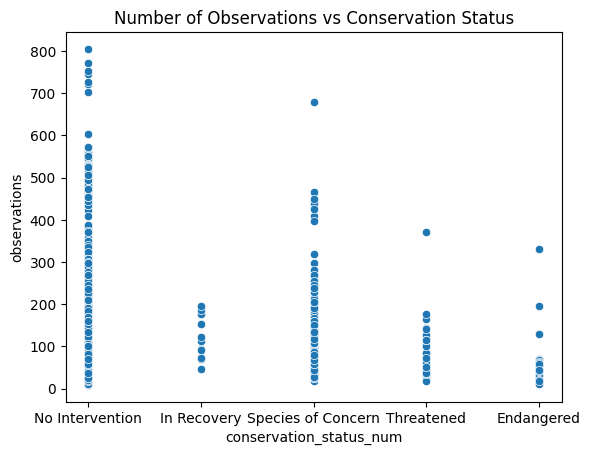

Does the number of observations of a species correlate with its conservation status?
Correlation:  -0.06641341665896287
Significant?:  False


In [161]:
#3. Does the number of observations of a species correlate with its conservation status?

#create numerical values for the conservation status
conservation_status_map = {'No Intervention': 0, 'In Recovery': 1, 'Species of Concern': 2, 'Threatened': 3, 'Endangered': 4}
all_data['conservation_status_num'] = all_data.conservation_status.map(conservation_status_map)

plot = sns.scatterplot(data=all_data, x='conservation_status_num', y='observations')
plot.set_xticks(range(5))
plot.set_xticklabels(conservation_status_map.keys())
plt.title('Number of Observations vs Conservation Status')
plt.show()

correlation = all_data['conservation_status_num'].corr(all_data['observations'])
print("Does the number of observations of a species correlate with its conservation status?")
print("Correlation: ", correlation)
print("Significant?: ", abs(correlation) > 0.5)


In [162]:
#4. Can we test if a specific park has a significantly higher observation number of a specific category of animal than the average of all parks?
results = pd.DataFrame(columns=['park', 'category', 't_stat', 'p_val', 'significant?'])

for park in parks:
    for category in species_df.category.unique():
        park_category_observations = merged_df[(merged_df.park_name == park) & (merged_df.category == category)].observations
        all_category_observations = merged_df[merged_df.category == category].observations

        #perform a t-test
        t_stat, p_val = stats.ttest_ind(park_category_observations, all_category_observations.mean())

        results.loc[len(results)] = [park, category, t_stat, p_val, p_val < 0.05]

        

print("Can we test if a specific park has a significantly higher observation number of a specific category of animal than the average of all parks?")
significance_results = results[results['significant?'] == True]
print(significance_results.to_markdown())




Can we test if a specific park has a significantly higher observation number of a specific category of animal than the average of all parks?
|    | park                                | category          |   t_stat |       p_val | significant?   |
|---:|:------------------------------------|:------------------|---------:|------------:|:---------------|
|  1 | Bryce National Park                 | Nonvascular Plant | -2.15734 | 0.0316966   | True           |
|  3 | Bryce National Park                 | Amphibian         | -2.02011 | 0.0468053   | True           |
|  7 | Great Smoky Mountains National Park | Vascular Plant    | -2.74459 | 0.00608402  | True           |
|  8 | Great Smoky Mountains National Park | Nonvascular Plant | -3.49193 | 0.000544421 | True           |
|  9 | Great Smoky Mountains National Park | Bird              | -2.43217 | 0.0153678   | True           |
| 10 | Great Smoky Mountains National Park | Amphibian         | -2.77809 | 0.00684664  | True           |
| 1

## Predictive

Can we predict conservation status based on observations, species category, and park name?

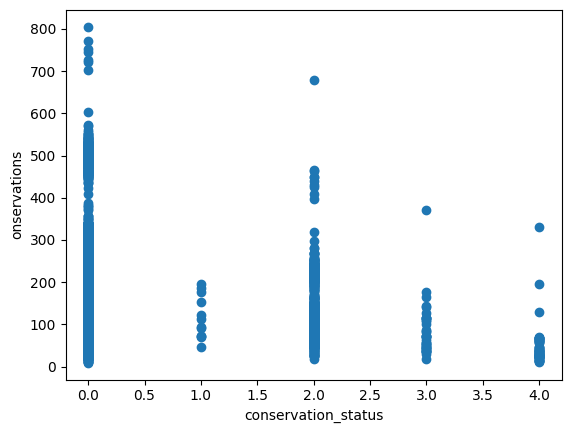

In [163]:
plt.scatter(all_data.conservation_status_num, all_data.observations)
plt.xlabel('conservation_status')
plt.ylabel('onservations')
plt.show()



In [ ]:
#BROKED

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

merged_df = pd.merge(observations_df, species_df, on='scientific_name')
merged_df['category_num'] = merged_df['category'].astype('category').cat.codes
merged_df['conservation_status_num'] = merged_df['conservation_status'].map({'No Intervention': 0, 'In Recovery': 1, 'Species of Concern': 2, 'Threatened': 3, 'Endangered': 4})
merged_df['park_name_num'] = merged_df['park_name'].astype('category').cat.codes
#count of no intervention species
no_intervention_count = merged_df[merged_df['conservation_status'] == 'No Intervention'].shape[0]
print("No Intervention Count: ", no_intervention_count)

# #reduce number of no intervention entries to 1000
# no_intervention_samples = merged_df[merged_df['conservation_status'] == 'No Intervention']
# merged_df = merged_df[merged_df['conservation_status'] != 'No Intervention']
# no_intervention_samples = no_intervention_samples.sample(n=15000, random_state=42)
# merged_df = pd.concat([merged_df, no_intervention_samples], ignore_index=True)

#remove no intervention entries




X = merged_df[['category_num', 'observations', 'park_name_num']]
y = merged_df['conservation_status_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check for class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
# Check the distribution of the target variable
print("Distribution of target variable before resampling:")
print(y_train.value_counts())
print("Distribution of target variable after resampling:")
print(y_resampled.value_counts())

# Fit model
regr = LinearRegression()
regr.fit(X_train, y_train)
print(f"intercept: {regr.intercept_}")
print(f"coef: {regr.coef_}")

# Predict
y_pred = regr.predict(X_test)

# Plot

#convert y_pred to categorical 
y_pred = pd.Series(y_pred).apply(lambda x: 0 if x < 0.5 else 1 if x < 1.5 else 2 if x < 2.5 else 3 if x < 3.5 else 4)
results_cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)
print("Accuracy: ", accuracy_score(y_test, y_pred))



sns.heatmap(results_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Predicted vs Actual Conservation Status')
plt.xlabel('Predicted Conservation Status')
plt.ylabel('Actual Conservation Status')



plt.show()



C:\Users\Holly\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.9057071960297767
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96      4271
           1       0.02      1.00      0.03         3
           2       0.18      0.09      0.12       138
           3       0.06      0.44      0.11         9
           4       0.08      0.33      0.13        12

    accuracy                           0.91      4433
   macro avg       0.26      0.56      0.27      4433
weighted avg       0.95      0.91      0.93      4433



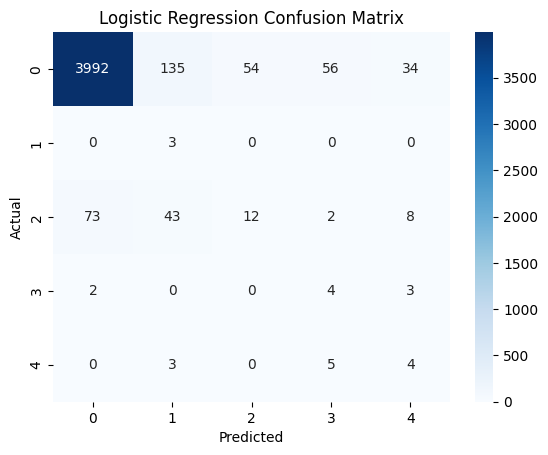


Random Forest Accuracy: 0.8987141890367697
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95      4271
           1       0.00      0.00      0.00         3
           2       0.12      0.32      0.17       138
           3       0.18      0.22      0.20         9
           4       0.63      1.00      0.77        12

    accuracy                           0.90      4433
   macro avg       0.38      0.49      0.42      4433
weighted avg       0.95      0.90      0.92      4433



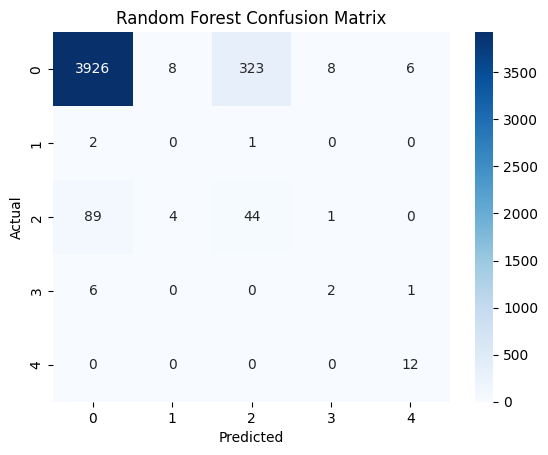

In [165]:

merged_df = pd.merge(observations_df, species_df, on='scientific_name', how='left')

merged_df = pd.get_dummies(merged_df, columns=['park_name', 'category'], drop_first=True)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
#no intervention = 0, in recovery = 1, species of concern = 2, threatened = 3, endangered = 4
merged_df['conservation_status_encoded'] = merged_df['conservation_status'].map({'No Intervention': 0, 'In Recovery': 1, 'Species of Concern': 2, 'Threatened': 3, 'Endangered': 4})

from sklearn.model_selection import train_test_split

X = merged_df.drop(['scientific_name', 'common_names', 'conservation_status', 'conservation_status_encoded'], axis=1)
y = merged_df['conservation_status_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
logistic_model = LogisticRegression(random_state=42, multi_class='auto', solver='liblinear', class_weight='balanced')
logistic_model.fit(X_train, y_train)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
logistic_predictions = logistic_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Evaluate Logistic Regression
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Logistic Regression Classification Report:\n", classification_report(y_test, logistic_predictions))
logistic_cm = confusion_matrix(y_test, logistic_predictions)
sns.heatmap(logistic_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate Random Forest Classifier
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("\nRandom Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))
rf_cm = confusion_matrix(y_test, rf_predictions)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


intercept: 103.69381126742223
coef: [ -0.78687266 -14.16264322  33.93334431]
Mean Squared Error:  5295.485769967915
R2 Score:  0.21336874048454813


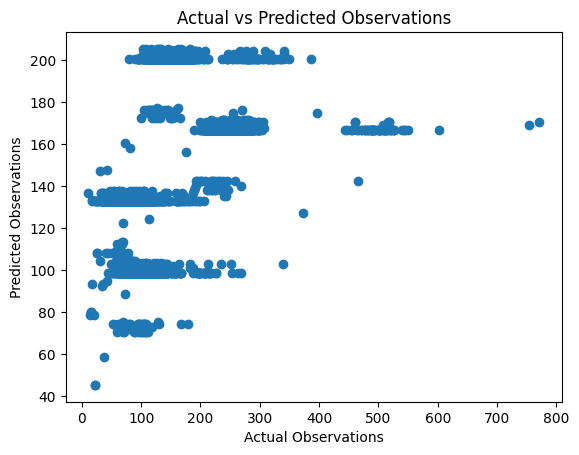

In [175]:
#predict observations using species, conservation status, park name 
#using logistic regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

merged_df = pd.merge(observations_df, species_df, on='scientific_name')
merged_df['category_num'] = merged_df['category'].astype('category').cat.codes
merged_df['conservation_status_num'] = merged_df['conservation_status'].map({'No Intervention': 0, 'In Recovery': 1, 'Species of Concern': 2, 'Threatened': 3, 'Endangered': 4})
merged_df['park_name_num'] = merged_df['park_name'].astype('category').cat.codes


X = merged_df[['category_num', 'conservation_status_num', 'park_name_num']]
y = merged_df['observations']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
regr = LinearRegression()
regr.fit(X_train, y_train)
print(f"intercept: {regr.intercept_}")
print(f"coef: {regr.coef_}")
# Predict
y_pred = regr.predict(X_test)
# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)
# Plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Observations')
plt.ylabel('Predicted Observations')
plt.title('Actual vs Predicted Observations')
plt.show()





intercept: 104.03203248364443
coef: [-26.10687004 156.27127758  51.7572256 ]
Mean Squared Error:  1844.2349821388796
R2 Score:  0.7260434736564019


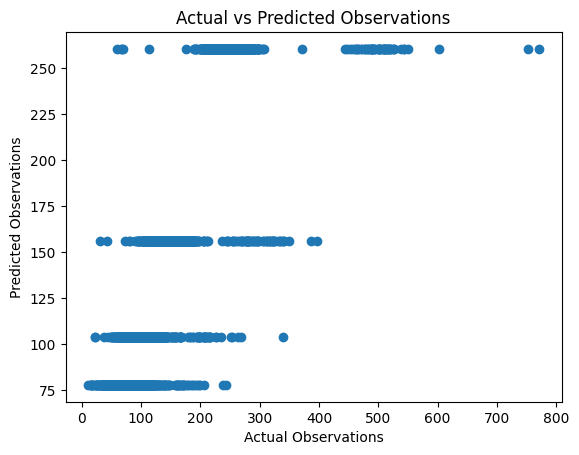

In [180]:
#can we predict observations using park name
from sklearn.linear_model import LinearRegression

merged_df = pd.merge(observations_df, species_df, on='scientific_name')

import pandas as pd
merged_df = pd.get_dummies(merged_df, columns = ['park_name'], drop_first = True)

x = merged_df.drop(['scientific_name', 'common_names', 'observations', 'category', 'conservation_status'], axis=1)
y = merged_df['observations']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

regr = LinearRegression()
regr.fit(X_train, y_train)
print(f"intercept: {regr.intercept_}")
print(f"coef: {regr.coef_}")

# Predict
y_pred = regr.predict(X_test)
# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)
# Plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Observations')
plt.ylabel('Predicted Observations')
plt.title('Actual vs Predicted Observations')
plt.show()


|       |   observations |
|------:|---------------:|
|  5094 |      -15.3033  |
|  5982 |        0.69669 |
| 21701 |      -22.9252  |
|  2638 |      -11.3033  |
| 19076 |      -15.032   |


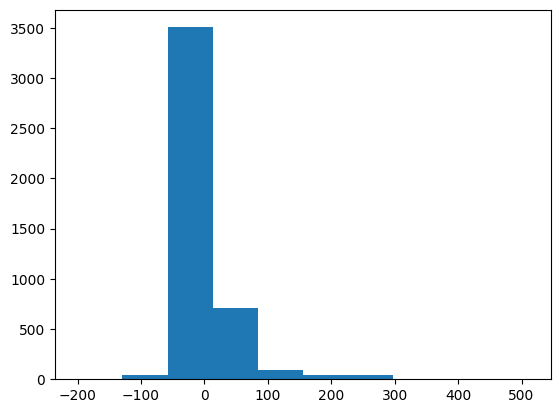

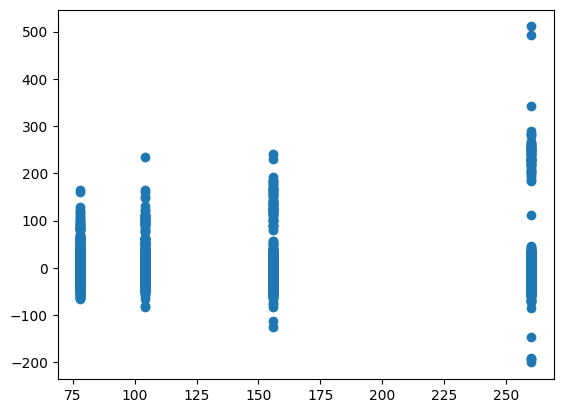

In [187]:
residules = y_test - y_pred
print(residules.head().to_markdown())

#normality 
plt.hist(residules)
plt.show()

#homoscedasticity
plt.scatter(y_pred, residules)
plt.show()


